# 🎵 Norwegian Wind Band Competition - Musical Piece Analysis

This notebook provides comprehensive analysis of musical pieces performed in Norwegian Wind Band competitions from 1981-2025, including:

- **Piece popularity and success rates** across 40+ years
- **Grade level analysis** for difficulty-appropriate repertoire selection
- **Set test piece detection** and impact on competition dynamics
- **Duration and time constraint analysis** for program optimization
- **Division-specific trends** and repertoire evolution

**Data Sources:**
- 911 unique pieces from competition database
- 2,338 total performances tracked
- WindRep.org metadata enrichment
- 40 suspected mandatory pieces identified

In [11]:
# Import necessary libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

from src.nmjanitsjar_scraper.piece_analysis import PieceAnalyzer, DivisionConstraints

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("🎼 Norwegian Wind Band Competition Analysis")
print("📊 Analyzing 40+ years of competition data...")

🎼 Norwegian Wind Band Competition Analysis
📊 Analyzing 40+ years of competition data...


## 1. Data Loading and Overview

In [12]:
# Initialize analyzer and load all data
analyzer = PieceAnalyzer()

# Get comprehensive piece analysis
print("Loading and analyzing all competition data...")
all_pieces = analyzer.analyze_piece_popularity()

print(f"✓ Loaded {len(all_pieces)} unique pieces")
print(f"✓ Total performances: {sum(p.performance_count for p in all_pieces.values()):,}")
print(f"✓ Average performances per piece: {sum(p.performance_count for p in all_pieces.values()) / len(all_pieces):.1f}")

Loading and analyzing all competition data...


Analyzing piece popularity across 40+ years of competitions...

Loading competition data from JSON APIs

✓ All data loaded successfully

✓ Loaded 2609 repertoire-to-piece mappings

✓ Loaded 1639 pieces from database

✓ Analyzed 911 unique pieces

✓ Loaded 911 unique pieces
✓ Total performances: 2,338
✓ Average performances per piece: 2.6


In [13]:
# Convert to DataFrame for easier analysis
pieces_data = []
for piece in all_pieces.values():
    pieces_data.append({
        'title': piece.title,
        'composer': piece.composer,
        'performances': piece.performance_count,
        'wins': int(piece.performance_count * piece.win_rate / 100),
        'win_rate': piece.win_rate,
        'avg_points': piece.avg_points,
        'duration_minutes': piece.duration_minutes,
        'grade_level': piece.grade_level,
        'difficulty': piece.difficulty,
        'category': piece.category
    })

df = pd.DataFrame(pieces_data)
print(f"📊 DataFrame created with {len(df)} pieces")
print("\nDataFrame Info:")
print(df.info())

📊 DataFrame created with 911 pieces

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             911 non-null    object 
 1   composer          911 non-null    object 
 2   performances      911 non-null    int64  
 3   wins              911 non-null    int64  
 4   win_rate          911 non-null    float64
 5   avg_points        910 non-null    float64
 6   duration_minutes  0 non-null      object 
 7   grade_level       0 non-null      object 
 8   difficulty        0 non-null      object 
 9   category          0 non-null      object 
dtypes: float64(2), int64(2), object(6)
memory usage: 71.3+ KB
None


In [14]:
# Basic statistics
print("🎯 Basic Statistics:")
print(f"Performance count range: {df['performances'].min()} - {df['performances'].max()}")
print(f"Win rate range: {df['win_rate'].min():.1f}% - {df['win_rate'].max():.1f}%")
print(f"Average points range: {df['avg_points'].min():.1f} - {df['avg_points'].max():.1f}")

# Show sample of data
print("\n📋 Sample Data:")
display(df.head(10))

🎯 Basic Statistics:
Performance count range: 1 - 32
Win rate range: 0.0% - 100.0%
Average points range: 78.0 - 99.0

📋 Sample Data:


,title,composer,performances,wins,win_rate,avg_points,duration_minutes,grade_level,difficulty,category
0,Symfoni no. 1,"Dmitri Shostakovich, arr. Peter Sebastian Szilvay",1,1,100.000000,97.670000,None,None,None,None
1,The Miraculous Mandarin,Béla Bartók,1,0,0.000000,95.670000,None,None,None,None
2,Dionysiaques,"Florent Schmitt, arr. Felix Hauswirth",1,0,0.000000,93.330000,None,None,None,None
3,El Jardin de Las Herspérides,José Suñer-Oriola,3,0,0.000000,94.280000,None,None,None,None
4,Bergakungen Suite,"Hugo Alfvén, arr. Anders Högstedt",2,0,0.000000,92.165000,None,None,None,None
5,Gendarmes' Duet,"Jaques Offenbach, arr. Ingar Bergby",1,0,0.000000,89.000000,None,None,None,None
6,Variazioni Sinfonische su “Non Potho Reposare”,Hardy Mertens,2,1,50.000000,92.335000,None,None,None,None
7,Memorias de un Hombre de Ciudad,Luis Serrano Alarcòn,4,1,25.000000,90.875000,None,None,None,None
8,From Ancient Times,Jan Van der Roost,4,1,25.000000,90.625000,None,None,None,None
9,"Symphony no. 1, ‘Gilgamesh’",Bert Appermont,9,2,22.222222,90.795556,None,None,None,None


## 2. Most Popular Pieces Analysis

In [5]:
# Get most popular pieces (3+ performances)
popular_pieces = analyzer.get_most_popular_pieces(min_performances=3)
print(f"🏆 Found {len(popular_pieces)} popular pieces (3+ performances)")

# Create DataFrame for popular pieces
popular_df = pd.DataFrame([{
    'title': p.title,
    'composer': p.composer,
    'performances': p.performance_count,
    'wins': int(p.performance_count * p.win_rate / 100),
    'win_rate': p.win_rate,
    'avg_points': p.avg_points
} for p in popular_pieces])

print("\n🎵 Top 15 Most Popular Pieces:")
display(popular_df.head(15).style.format({
    'win_rate': '{:.1f}%',
    'avg_points': '{:.1f}'
}))

Analyzing piece popularity across 40+ years of competitions...

Loading competition data from JSON APIs

✓ All data loaded successfully

✓ Loaded 2609 repertoire-to-piece mappings

✓ Loaded 1639 pieces from database

✓ Analyzed 911 unique pieces

🏆 Found 218 popular pieces (3+ performances)

🎵 Top 15 Most Popular Pieces:


,title,composer,performances,wins,win_rate,avg_points
0,Puszta (Four Gypsi Dances),Jan Van der Roost,32,2,6.2%,89.3
1,Incantation and Dance,John Barnes Chance,24,3,12.5%,88.2
2,Variations for Band,John Brakstad,24,0,4.2%,86.0
3,"Armenian Dances, Part 1",Alfred Reed,23,4,17.4%,89.5
4,Blue Shades,Frank Ticheli,23,3,13.0%,90.0
5,Music for a Festival,Philip Sparke,23,4,17.4%,87.8
6,Lake of the Moon,Kevin Houben,21,0,0.0%,88.3
7,A Jubilant Overture,Alfred Reed,20,1,5.0%,87.7
8,Festivo,Edward Gregson,20,2,10.0%,87.8
9,Banja Luka,Jan de Haan,19,3,15.8%,90.6


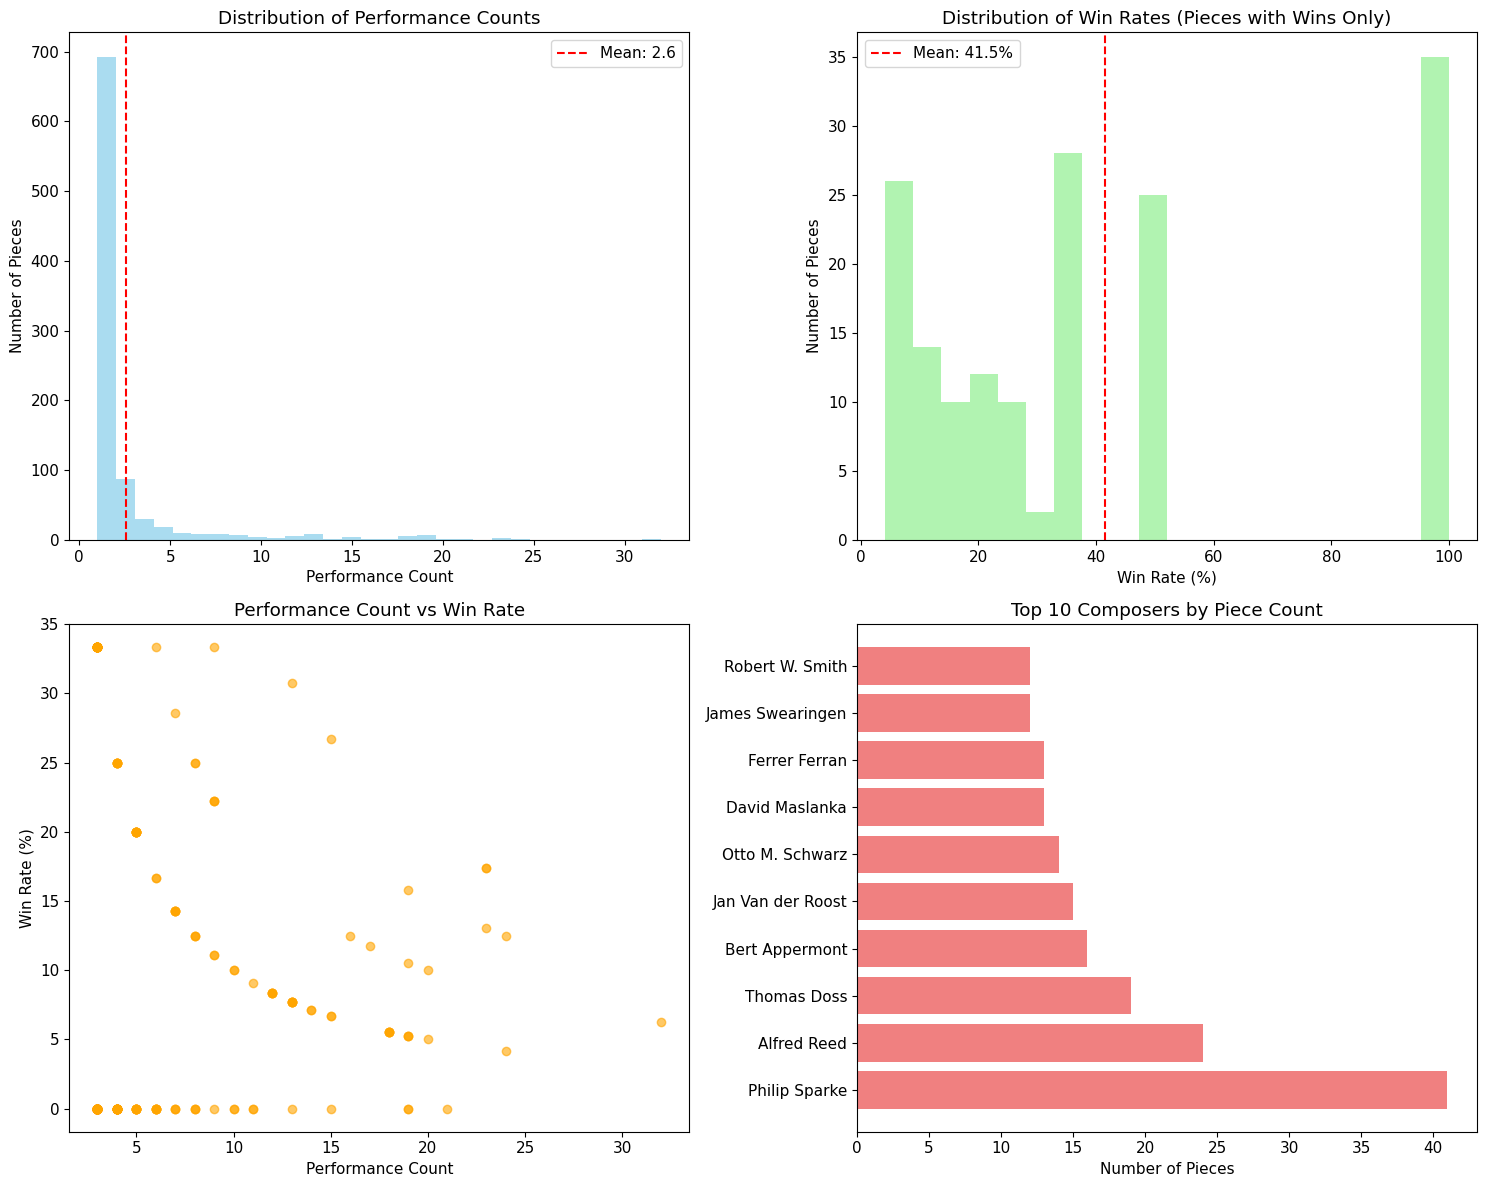

In [6]:
# Visualize performance distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Performance count distribution
axes[0,0].hist(df['performances'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_xlabel('Performance Count')
axes[0,0].set_ylabel('Number of Pieces')
axes[0,0].set_title('Distribution of Performance Counts')
axes[0,0].axvline(df['performances'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["performances"].mean():.1f}')
axes[0,0].legend()

# Win rate distribution
win_rates = df[df['win_rate'] > 0]['win_rate']  # Only pieces with wins
axes[0,1].hist(win_rates, bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_xlabel('Win Rate (%)')
axes[0,1].set_ylabel('Number of Pieces')
axes[0,1].set_title('Distribution of Win Rates (Pieces with Wins Only)')
axes[0,1].axvline(win_rates.mean(), color='red', linestyle='--',
                  label=f'Mean: {win_rates.mean():.1f}%')
axes[0,1].legend()

# Performance vs Win Rate scatter
successful_pieces = df[df['performances'] >= 3]  # Focus on pieces with enough data
axes[1,0].scatter(successful_pieces['performances'], successful_pieces['win_rate'], 
                  alpha=0.6, color='orange')
axes[1,0].set_xlabel('Performance Count')
axes[1,0].set_ylabel('Win Rate (%)')
axes[1,0].set_title('Performance Count vs Win Rate')

# Top composers by piece count
composer_counts = df['composer'].value_counts().head(10)
axes[1,1].barh(composer_counts.index, composer_counts.values, color='lightcoral')
axes[1,1].set_xlabel('Number of Pieces')
axes[1,1].set_title('Top 10 Composers by Piece Count')

plt.tight_layout()
plt.show()

## 3. WindRep.org Data Enrichment Analysis

In [7]:
# Enrich top pieces with WindRep data
print("🌐 Enriching top 200 pieces with WindRep.org metadata...")
enriched_pieces = analyzer.enrich_with_windrep_data(popular_pieces[:200], max_pieces=200)

# Create DataFrame for enriched data
enriched_df = pd.DataFrame([{
    'title': p.title,
    'composer': p.composer,
    'performances': p.performance_count,
    'win_rate': p.win_rate,
    'avg_points': p.avg_points,
    'duration_minutes': p.duration_minutes,
    'grade_level': p.grade_level,
    'difficulty': p.difficulty,
    'windrep_url': p.windrep_url
} for p in enriched_pieces])

# Count successful enrichments
with_url = enriched_df['windrep_url'].notna().sum()
with_duration = enriched_df['duration_minutes'].notna().sum()
with_grade = enriched_df['grade_level'].notna().sum()

print(f"✓ {with_url}/{len(enriched_df)} pieces found on WindRep.org")
print(f"✓ {with_duration}/{len(enriched_df)} pieces with duration data")
print(f"✓ {with_grade}/{len(enriched_df)} pieces with grade level data")

# Show enriched data
print("\n🎼 Enriched Pieces with Metadata:")
enriched_display = enriched_df[enriched_df['duration_minutes'].notna() | 
                              enriched_df['grade_level'].notna()].copy()
if not enriched_display.empty:
    display(enriched_display[['title', 'composer', 'performances', 'duration_minutes', 
                             'grade_level', 'difficulty']].style.format({
        'duration_minutes': '{:.1f} min',
        'grade_level': lambda x: f'Grade {int(x)}' if pd.notna(x) else 'Unknown'
    }))
else:
    print("No pieces with duration or grade level data found in this sample.")

🌐 Enriching top 25 pieces with WindRep.org metadata...


Enriching top 25 pieces with WindRep.org data...

Output()

✓ Enriched 25 pieces with external data

✓ 11/25 pieces found on WindRep.org
✓ 10/25 pieces with duration data
✓ 0/25 pieces with grade level data

🎼 Enriched Pieces with Metadata:


,title,composer,performances,duration_minutes,grade_level,difficulty
1,Incantation and Dance,John Barnes Chance,24,7.8 min,Unknown,None
4,Blue Shades,Frank Ticheli,23,10.5 min,Unknown,None
5,Music for a Festival,Philip Sparke,23,33.8 min,Unknown,None
8,Festivo,Edward Gregson,20,2.5 min,Unknown,None
11,Theatre Music,Philip Sparke,19,10.4 min,Unknown,None
12,Fanfare and Choral,Egil Hovland,19,7.6 min,Unknown,None
15,Cartoon,Paul Hart,19,9.9 min,Unknown,None
16,El Camino Real,Alfred Reed,18,10.0 min,Unknown,None
17,Dawn Flight,Philip Wilby,18,9.0 min,Unknown,None
23,Pilatus: Mountain of Dragons,Steven Reineke,15,10.0 min,Unknown,None


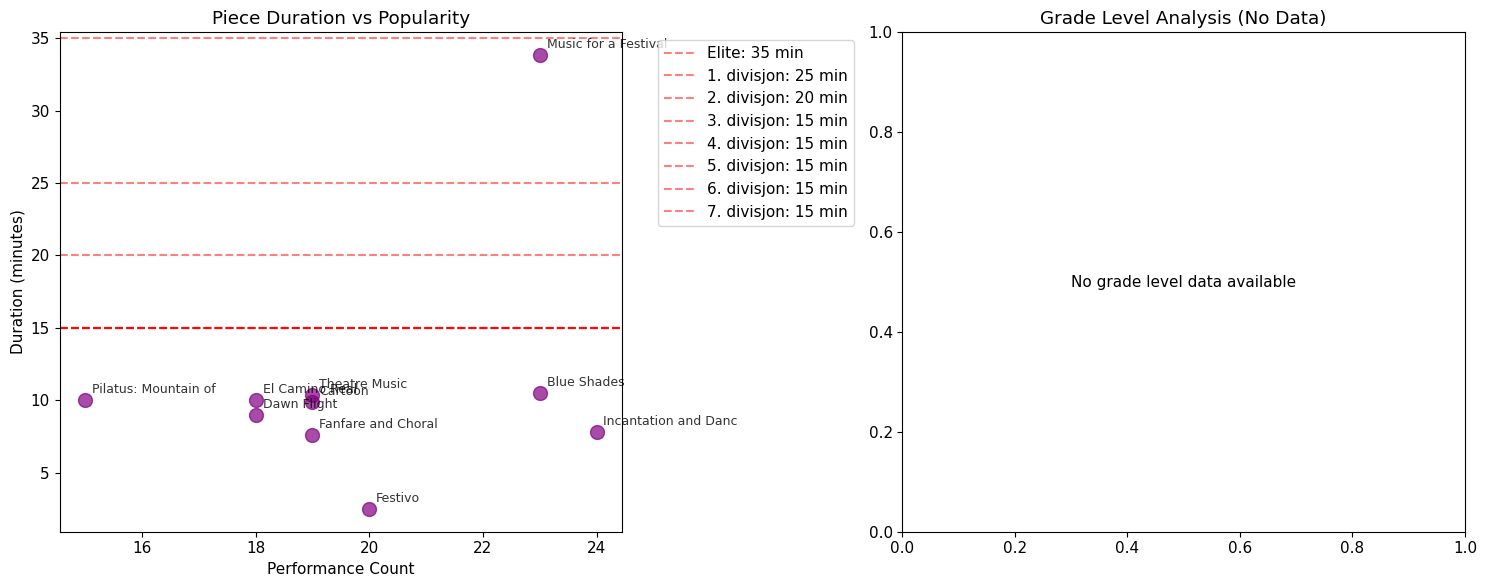

In [8]:
# Visualize enriched data
if with_duration > 0 or with_grade > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Duration analysis
    if with_duration > 0:
        duration_data = enriched_df[enriched_df['duration_minutes'].notna()]
        axes[0].scatter(duration_data['performances'], duration_data['duration_minutes'], 
                       s=100, alpha=0.7, color='purple')
        for i, row in duration_data.iterrows():
            axes[0].annotate(row['title'][:20], 
                           (row['performances'], row['duration_minutes']),
                           xytext=(5, 5), textcoords='offset points', 
                           fontsize=9, alpha=0.8)
        axes[0].set_xlabel('Performance Count')
        axes[0].set_ylabel('Duration (minutes)')
        axes[0].set_title('Piece Duration vs Popularity')
        
        # Add division time constraint lines
        constraints = DivisionConstraints.get_constraints()
        for div_name, constraint in constraints.items():
            axes[0].axhline(y=constraint.max_minutes, color='red', linestyle='--', 
                           alpha=0.5, label=f'{div_name}: {constraint.max_minutes} min')
        axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[0].text(0.5, 0.5, 'No duration data available', 
                    transform=axes[0].transAxes, ha='center', va='center')
        axes[0].set_title('Duration Analysis (No Data)')
    
    # Grade level analysis
    if with_grade > 0:
        grade_data = enriched_df[enriched_df['grade_level'].notna()]
        grade_counts = grade_data['grade_level'].value_counts().sort_index()
        axes[1].bar(grade_counts.index, grade_counts.values, color='teal', alpha=0.7)
        axes[1].set_xlabel('Grade Level')
        axes[1].set_ylabel('Number of Pieces')
        axes[1].set_title('Distribution of Grade Levels')
        axes[1].set_xticks(range(1, 8))
        axes[1].set_xticklabels([f'Grade {i}' for i in range(1, 8)])
    else:
        axes[1].text(0.5, 0.5, 'No grade level data available', 
                    transform=axes[1].transAxes, ha='center', va='center')
        axes[1].set_title('Grade Level Analysis (No Data)')
    
    plt.tight_layout()
    plt.show()
else:
    print("No enriched data available for visualization.")

## 4. Set Test Piece Analysis

In [9]:
# Analyze suspected set test pieces
print("🔍 Analyzing suspected set test pieces...")
set_pieces = analyzer.analyze_set_test_pieces()

print(f"Found {len(set_pieces)} year-division combinations with suspected set pieces")
total_suspected = sum(len(pieces) for pieces in set_pieces.values())
print(f"Total suspected mandatory pieces: {total_suspected}")

# Convert to DataFrame for analysis
set_pieces_data = []
for key, pieces in set_pieces.items():
    for piece in pieces:
        set_pieces_data.append(piece)

set_df = pd.DataFrame(set_pieces_data)

if not set_df.empty:
    print("\n🎯 Top Suspected Set Test Pieces (100% performance rate):")
    perfect_scores = set_df[set_df['percentage_of_division'] == 100.0]
    display(perfect_scores[['year', 'division', 'title', 'composer', 'performances']].head(10))
else:
    print("No set test pieces identified.")

🔍 Analyzing suspected set test pieces...


Analyzing potential set test pieces...

Loading competition data from JSON APIs

✓ All data loaded successfully

✓ Identified 40 potential set test pieces

Found 40 year-division combinations with suspected set pieces
Total suspected mandatory pieces: 40

🎯 Top Suspected Set Test Pieces (100% performance rate):


,year,division,title,composer,performances
0,2004,1,"Heroes, Lost and Fallen",David R. Gillingham,12
1,2004,2,Festivo,Edward Gregson,15
2,2003,1,Awayday,Adam Gorb,12
3,2003,2,Puszta (Four Gypsi Dances),Jan Van der Roost,15
4,2002,1,New World Dances,Martin Ellerby,12
5,2002,2,Fanfare and Allegro,Clifton Williams,14
6,2001,1,Blue Shades,Frank Ticheli,12
7,2001,2,Dawn Flight,Philip Wilby,16
8,2000,1,Pulsare,Helge Hurum,12
9,2000,2,A Jubilant Overture,Alfred Reed,15


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

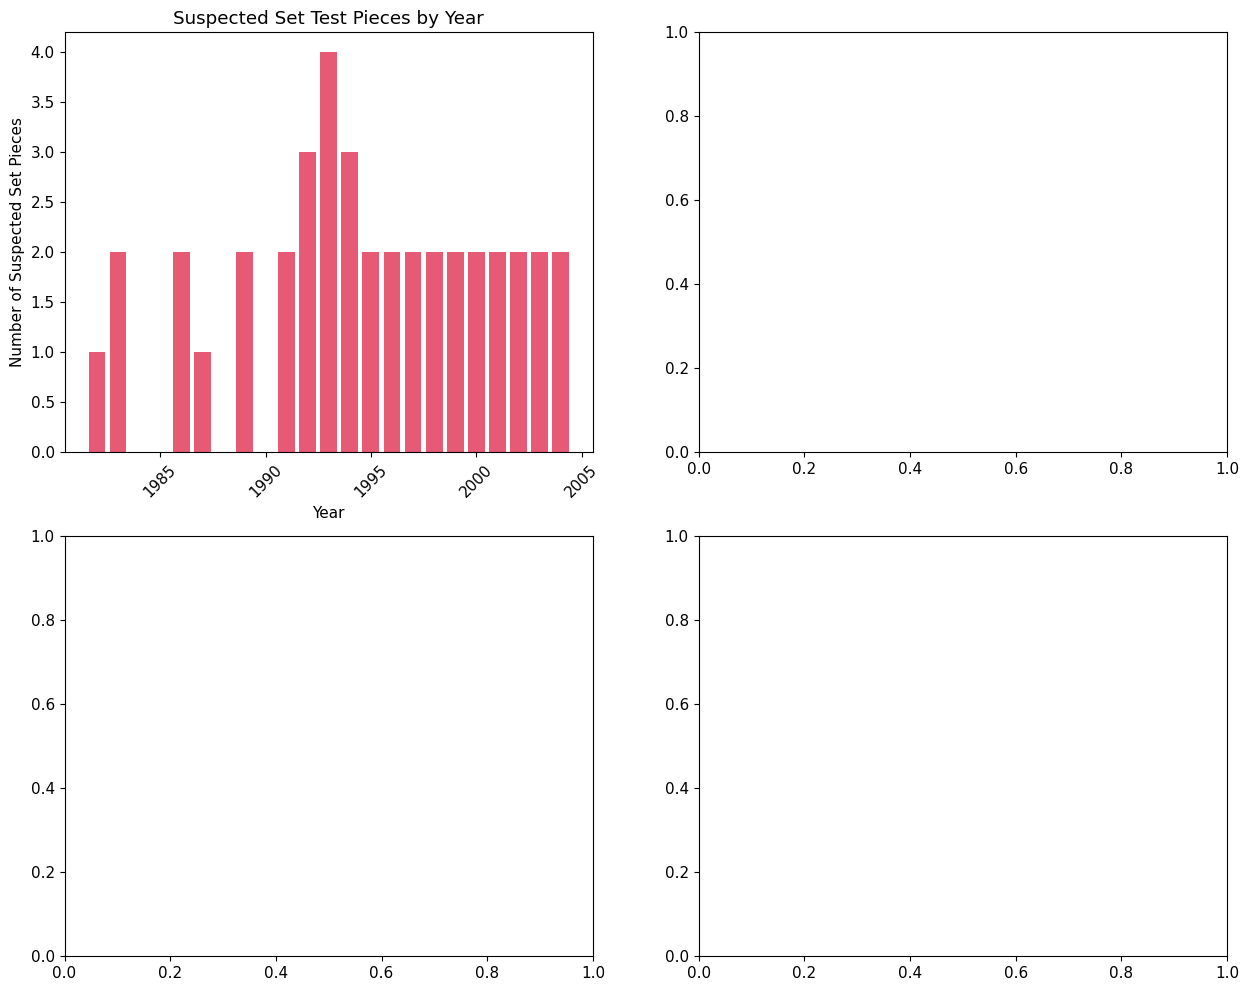

In [10]:
# Visualize set test piece patterns
if not set_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Set pieces by year
    year_counts = set_df['year'].value_counts().sort_index()
    axes[0,0].bar(year_counts.index, year_counts.values, color='crimson', alpha=0.7)
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Suspected Set Pieces')
    axes[0,0].set_title('Suspected Set Test Pieces by Year')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Set pieces by division
    division_counts = set_df['division'].value_counts()
    axes[0,1].bar(range(len(division_counts)), division_counts.values, color='orange', alpha=0.7)
    axes[0,1].set_xlabel('Division')
    axes[0,1].set_ylabel('Number of Suspected Set Pieces')
    axes[0,1].set_title('Suspected Set Test Pieces by Division')
    axes[0,1].set_xticks(range(len(division_counts)))
    axes[0,1].set_xticklabels(division_counts.index)
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_xticklabels(division_counts.index)
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Performance percentage distribution
    axes[1,0].hist(set_df['percentage_of_division'], bins=20, color='green', alpha=0.7)
    axes[1,0].set_xlabel('Percentage of Division (%)')
    axes[1,0].set_ylabel('Number of Pieces')
    axes[1,0].set_title('Distribution of Performance Percentages')
    axes[1,0].axvline(100, color='red', linestyle='--', label='100% (Definitely mandatory)')
    axes[1,0].legend()
    
    # Most common set piece composers
    composer_counts = set_df['composer'].value_counts().head(8)
    axes[1,1].barh(composer_counts.index, composer_counts.values, color='purple', alpha=0.7)
    axes[1,1].set_xlabel('Number of Suspected Set Pieces')
    axes[1,1].set_title('Composers Most Featured in Set Pieces')
    
    plt.tight_layout()
    plt.show()
    
    # Show timeline of set pieces
    print("\n📅 Timeline of Suspected Set Test Pieces:")
    timeline = set_df[set_df['percentage_of_division'] == 100.0].sort_values('year')
    for _, row in timeline.iterrows():
        print(f"{row['year']} - {row['division']}: '{row['title']}' by {row['composer']} ({row['performances']} performances)")
else:
    print("No set test piece data to visualize.")

## 5. Success Rate Analysis

In [15]:
# Get highest success rate pieces
successful_pieces = analyzer.get_highest_success_pieces(min_performances=2)
print(f"🏆 Found {len(successful_pieces)} pieces with success data (2+ performances)")

# Create DataFrame for successful pieces
success_df = pd.DataFrame([{
    'title': p.title,
    'composer': p.composer,
    'performances': p.performance_count,
    'wins': int(p.performance_count * p.win_rate / 100),
    'win_rate': p.win_rate,
    'avg_points': p.avg_points
} for p in successful_pieces if p.win_rate > 0])  # Only pieces with wins

print("\n🎖️ Top 15 Most Successful Pieces:")
display(success_df.head(15).style.format({
    'win_rate': '{:.1f}%',
    'avg_points': '{:.1f}'
}))

Analyzing piece popularity across 40+ years of competitions...

Loading competition data from JSON APIs

✓ All data loaded successfully

✓ Loaded 2609 repertoire-to-piece mappings

✓ Loaded 1639 pieces from database

✓ Analyzed 911 unique pieces

🏆 Found 351 pieces with success data (2+ performances)

🎖️ Top 15 Most Successful Pieces:


,title,composer,performances,wins,win_rate,avg_points
0,Variazioni Sinfonische su “Non Potho Reposare”,Hardy Mertens,2,1,50.0%,92.3
1,Music of the Spheres,Philip Sparke,2,1,50.0%,92.5
2,"Symphony No IV: Bookmarks from Japan, 1., 2., 4., 5., og 6. sats",Julie Giroux,2,1,50.0%,92.0
3,The White Deer,Thomas Doss,2,1,50.0%,91.8
4,Pompeii: The Ruins Know the Long and Magnificent History,Satoshi Yagisawa,2,1,50.0%,95.0
5,Lux Perpetua,Frank Ticheli,2,1,50.0%,93.2
6,Slava!,Leonard Bernstein,2,1,50.0%,90.5
7,Aurora Borealis,Rossano Galante,2,1,50.0%,90.5
8,Polovetsian Dances from Prince Igor,"Alexander Borodin, arr. Mark Hindsley",2,1,50.0%,91.0
9,"Hymn to the Sun - With the Beat of Mother Earth, New version 2010",Satoshi Yagisawa,2,1,50.0%,94.5


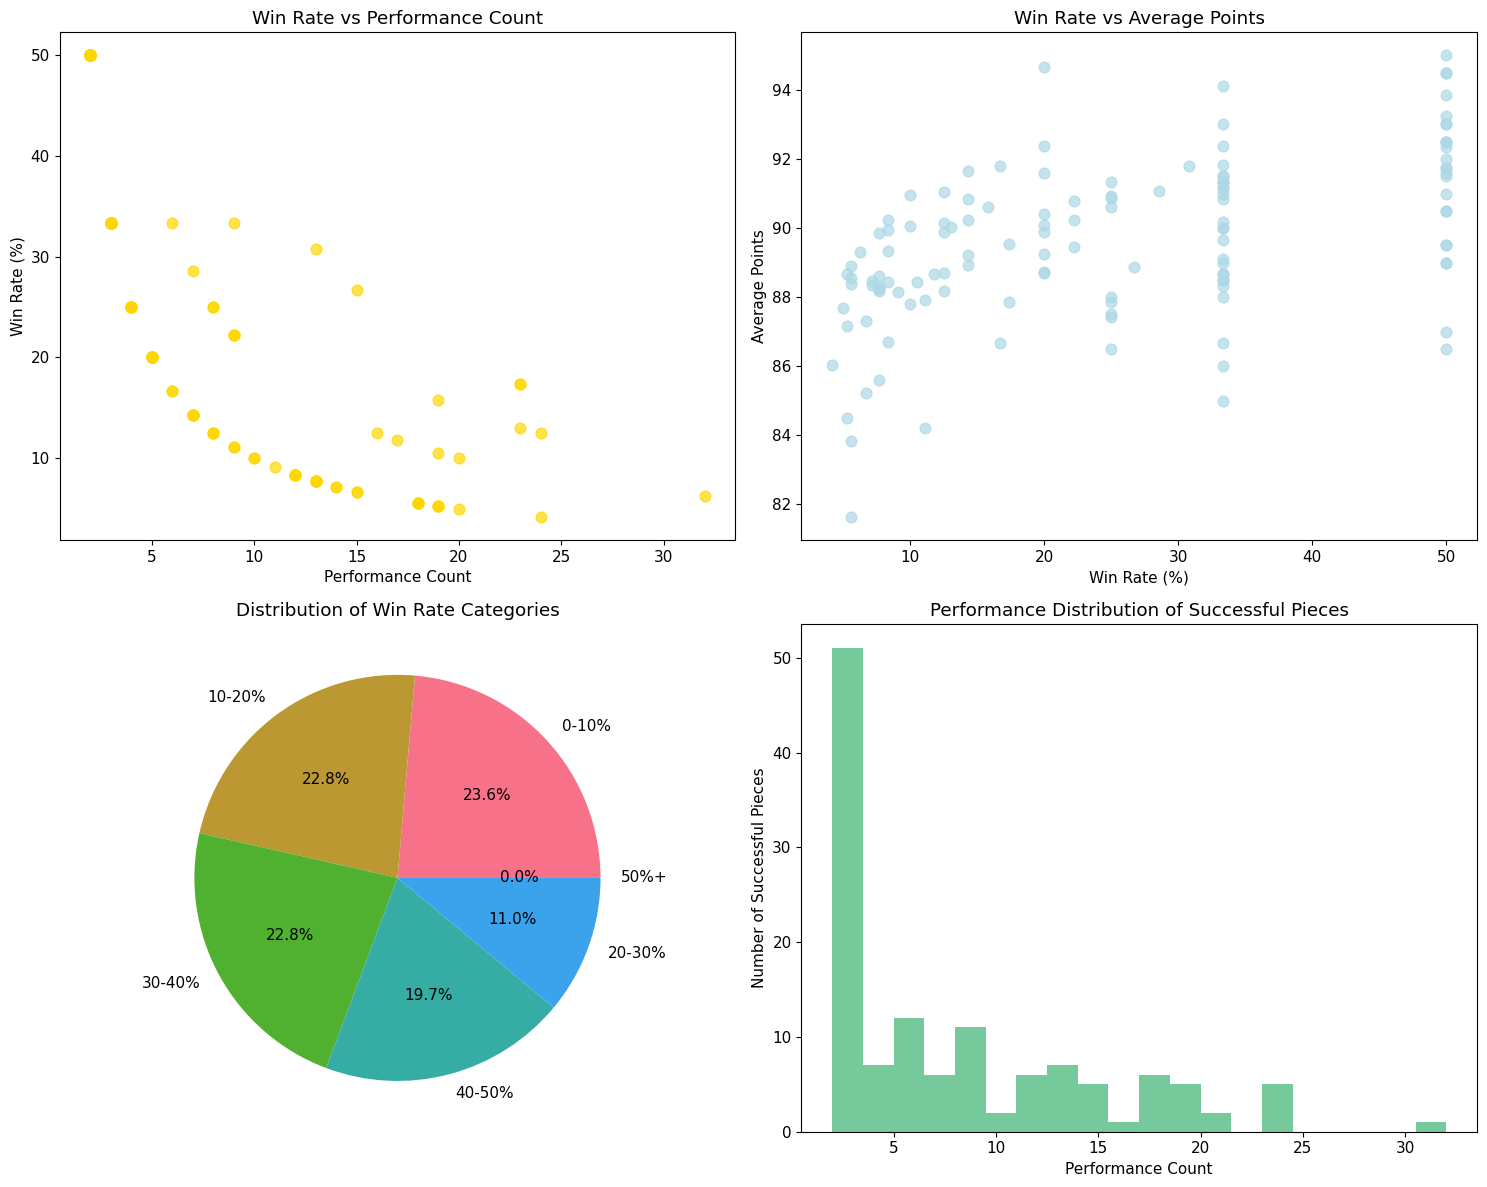


📈 Success Rate Insights:
Mean win rate: 25.4%
Median win rate: 25.0%
Pieces with >50% win rate: 0
Perfect win rate pieces (100%): 0


In [16]:
# Success rate analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Success rate vs performance count
axes[0,0].scatter(success_df['performances'], success_df['win_rate'], 
                  s=60, alpha=0.7, color='gold')
axes[0,0].set_xlabel('Performance Count')
axes[0,0].set_ylabel('Win Rate (%)')
axes[0,0].set_title('Win Rate vs Performance Count')

# Average points vs win rate
valid_points = success_df[success_df['avg_points'].notna()]
if not valid_points.empty:
    axes[0,1].scatter(valid_points['win_rate'], valid_points['avg_points'], 
                      s=60, alpha=0.7, color='lightblue')
    axes[0,1].set_xlabel('Win Rate (%)')
    axes[0,1].set_ylabel('Average Points')
    axes[0,1].set_title('Win Rate vs Average Points')
else:
    axes[0,1].text(0.5, 0.5, 'No points data available', 
                   transform=axes[0,1].transAxes, ha='center')

# Win rate categories
win_rate_bins = [0, 10, 20, 30, 40, 50, 100]
win_rate_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
success_df['win_rate_category'] = pd.cut(success_df['win_rate'], bins=win_rate_bins, 
                                        labels=win_rate_labels, include_lowest=True)
category_counts = success_df['win_rate_category'].value_counts()
axes[1,0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Distribution of Win Rate Categories')

# Performance count distribution for successful pieces
axes[1,1].hist(success_df['performances'], bins=20, color='mediumseagreen', alpha=0.7)
axes[1,1].set_xlabel('Performance Count')
axes[1,1].set_ylabel('Number of Successful Pieces')
axes[1,1].set_title('Performance Distribution of Successful Pieces')

plt.tight_layout()
plt.show()

# Statistical insights
print("\n📈 Success Rate Insights:")
print(f"Mean win rate: {success_df['win_rate'].mean():.1f}%")
print(f"Median win rate: {success_df['win_rate'].median():.1f}%")
print(f"Pieces with >50% win rate: {(success_df['win_rate'] > 50).sum()}")
print(f"Perfect win rate pieces (100%): {(success_df['win_rate'] == 100).sum()}")

## 6. Composer Analysis

In [17]:
# Analyze composers
composer_stats = df.groupby('composer').agg({
    'title': 'count',
    'performances': 'sum',
    'wins': 'sum',
    'win_rate': 'mean',
    'avg_points': 'mean'
}).rename(columns={'title': 'piece_count'})

# Filter composers with multiple pieces
prolific_composers = composer_stats[composer_stats['piece_count'] >= 2].sort_values('performances', ascending=False)

print(f"🎼 Analysis of {len(prolific_composers)} composers with 2+ pieces in database")
print("\n🏆 Top 15 Most Performed Composers:")
display(prolific_composers.head(15).style.format({
    'win_rate': '{:.1f}%',
    'avg_points': '{:.1f}'
}))

🎼 Analysis of 122 composers with 2+ pieces in database

🏆 Top 15 Most Performed Composers:


,piece_count,performances,wins,win_rate,avg_points
composer,,,,,
Philip Sparke,41,120,6,4.9%,87.0
Alfred Reed,24,119,12,7.6%,88.3
Jan de Haan,9,69,4,3.1%,88.1
Frank Ticheli,11,64,9,11.0%,88.3
Bert Appermont,16,61,4,4.2%,87.4
Jan Van der Roost,15,59,3,6.5%,88.6
James Barnes,8,50,2,2.7%,88.6
Jacob de Haan,10,44,2,10.7%,87.3
John Brakstad,11,42,1,8.0%,86.7


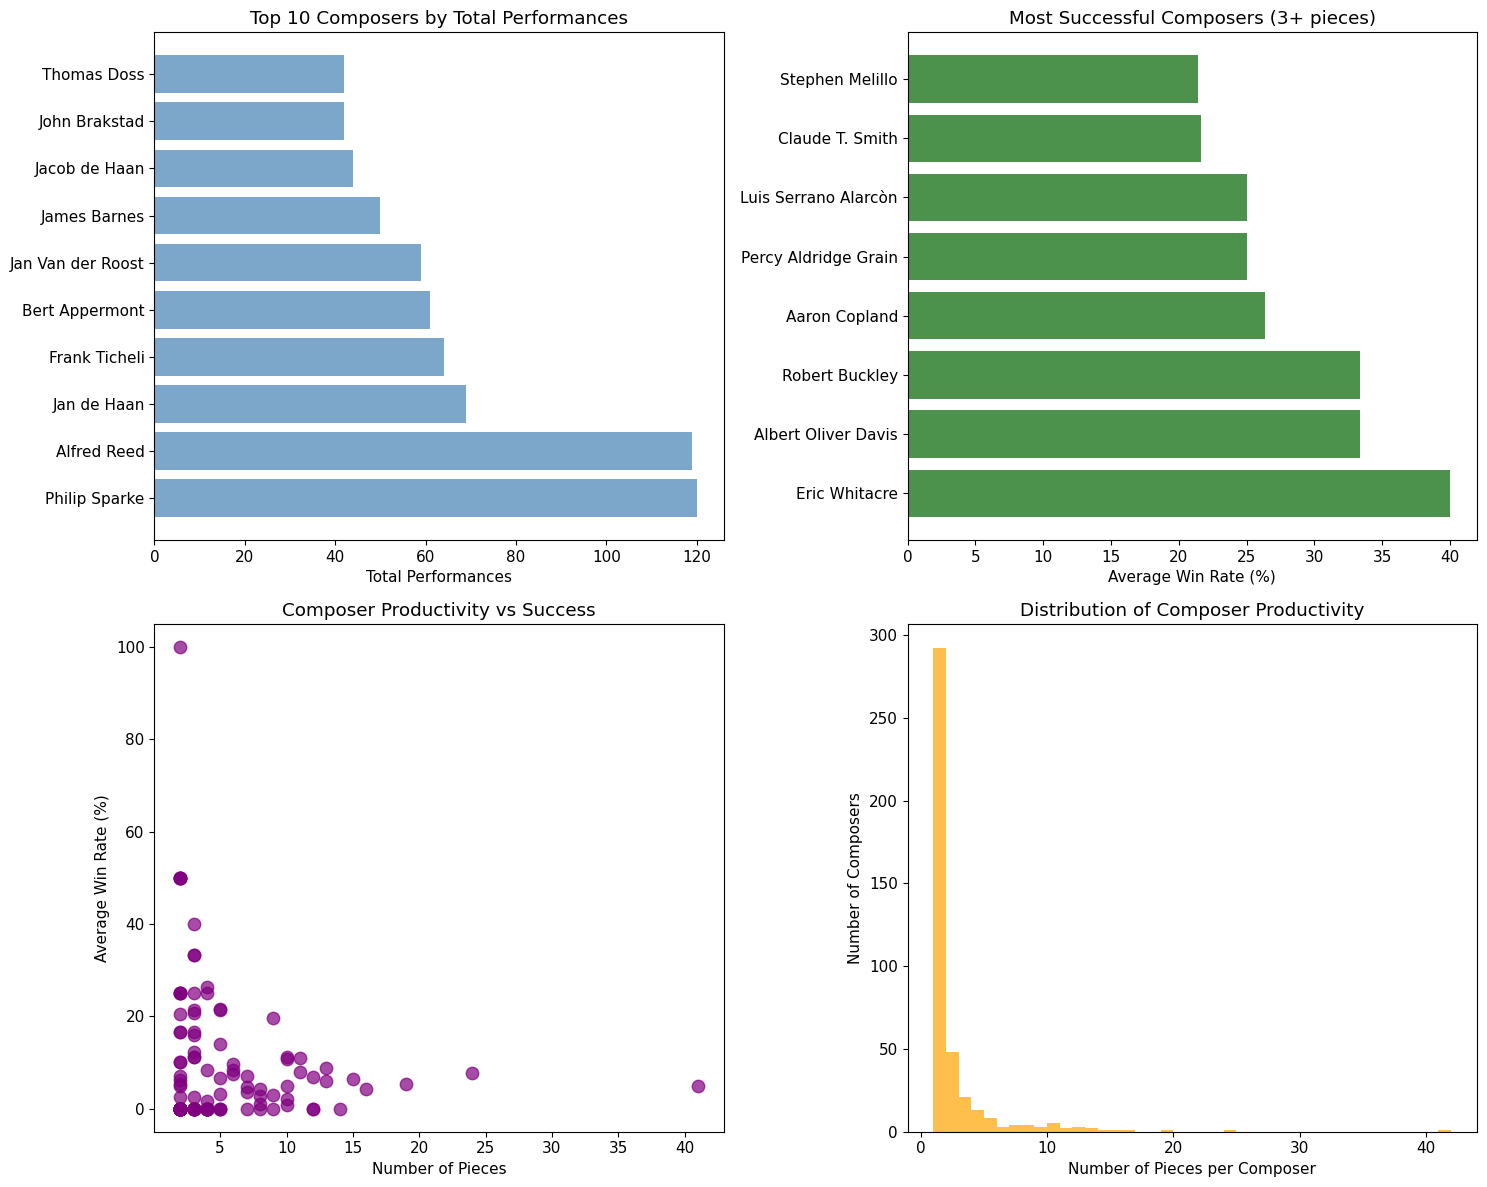

In [18]:
# Composer visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top composers by total performances
top_by_performances = prolific_composers.head(10)
axes[0,0].barh(range(len(top_by_performances)), top_by_performances['performances'], 
               color='steelblue', alpha=0.7)
axes[0,0].set_yticks(range(len(top_by_performances)))
axes[0,0].set_yticklabels([name[:20] for name in top_by_performances.index])
axes[0,0].set_xlabel('Total Performances')
axes[0,0].set_title('Top 10 Composers by Total Performances')

# Composers by average win rate (min 3 pieces)
successful_composers = prolific_composers[prolific_composers['piece_count'] >= 3].sort_values('win_rate', ascending=False)
if not successful_composers.empty:
    top_success = successful_composers.head(8)
    axes[0,1].barh(range(len(top_success)), top_success['win_rate'], 
                   color='darkgreen', alpha=0.7)
    axes[0,1].set_yticks(range(len(top_success)))
    axes[0,1].set_yticklabels([name[:20] for name in top_success.index])
    axes[0,1].set_xlabel('Average Win Rate (%)')
    axes[0,1].set_title('Most Successful Composers (3+ pieces)')
else:
    axes[0,1].text(0.5, 0.5, 'Insufficient data', transform=axes[0,1].transAxes, ha='center')

# Piece count vs average win rate
axes[1,0].scatter(prolific_composers['piece_count'], prolific_composers['win_rate'], 
                  s=80, alpha=0.7, color='purple')
axes[1,0].set_xlabel('Number of Pieces')
axes[1,0].set_ylabel('Average Win Rate (%)')
axes[1,0].set_title('Composer Productivity vs Success')

# Distribution of pieces per composer
axes[1,1].hist(composer_stats['piece_count'], bins=range(1, composer_stats['piece_count'].max()+2), 
               color='orange', alpha=0.7)
axes[1,1].set_xlabel('Number of Pieces per Composer')
axes[1,1].set_ylabel('Number of Composers')
axes[1,1].set_title('Distribution of Composer Productivity')

plt.tight_layout()
plt.show()

## 7. Division Constraints and Time Analysis

In [19]:
# Analyze division constraints
constraints = DivisionConstraints.get_constraints()
print("🎯 Division Time Constraints:")

constraints_df = pd.DataFrame([
    {'Division': name, 'Max Minutes': constraint.max_minutes, 'Max Pieces': constraint.max_pieces}
    for name, constraint in constraints.items()
])

display(constraints_df)

# Analyze pieces with duration data against constraints
duration_pieces = enriched_df[enriched_df['duration_minutes'].notna()]

if not duration_pieces.empty:
    print(f"\n⏱️ Duration Analysis ({len(duration_pieces)} pieces with duration data):")
    
    # Check which divisions each piece could fit into
    for _, piece in duration_pieces.iterrows():
        suitable_divisions = []
        for div_name, constraint in constraints.items():
            if piece['duration_minutes'] <= constraint.max_minutes:
                suitable_divisions.append(div_name)
        
        print(f"'{piece['title'][:30]}...' ({piece['duration_minutes']:.1f} min) -> Suitable for: {', '.join(suitable_divisions)}")
else:
    print("\nNo duration data available for constraint analysis.")

🎯 Division Time Constraints:


,Division,Max Minutes,Max Pieces
0,Elite,35,NaN
1,1. divisjon,25,NaN
2,2. divisjon,20,NaN
3,3. divisjon,15,3.0
4,4. divisjon,15,3.0
5,5. divisjon,15,3.0
6,6. divisjon,15,3.0
7,7. divisjon,15,3.0



⏱️ Duration Analysis (10 pieces with duration data):
'Incantation and Dance...' (7.8 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'Blue Shades...' (10.5 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'Music for a Festival...' (33.8 min) -> Suitable for: Elite
'Festivo...' (2.5 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'Theatre Music...' (10.4 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'Fanfare and Choral...' (7.6 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'Cartoon...' (9.9 min) -> Suitable for: Elite, 1. divisjon, 2. divisjon, 3. divisjon, 4. divisjon, 5. divisjon, 6. divisjon, 7. divisjon
'El Camino Real...' (10.0 m

In [2]:
# Visualize duration constraints
if not duration_pieces.empty:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Duration distribution with constraint lines
    axes[0].hist(duration_pieces['duration_minutes'], bins=15, alpha=0.7, color='teal')
    axes[0].set_xlabel('Duration (minutes)')
    axes[0].set_ylabel('Number of Pieces')
    axes[0].set_title('Piece Duration Distribution')
    
    # Add constraint lines
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink']
    for i, (div_name, constraint) in enumerate(constraints.items()):
        axes[0].axvline(constraint.max_minutes, color=colors[i % len(colors)], 
                       linestyle='--', alpha=0.8, label=f'{div_name}')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Constraint compatibility matrix
    compatibility_data = []
    for _, piece in duration_pieces.iterrows():
        row = [piece['title'][:20]]
        for div_name, constraint in constraints.items():
            row.append(1 if piece['duration_minutes'] <= constraint.max_minutes else 0)
        compatibility_data.append(row)
    
    if compatibility_data:
        compatibility_df = pd.DataFrame(compatibility_data, 
                                      columns=['Piece'] + list(constraints.keys()))
        
        # Create heatmap
        heatmap_data = compatibility_df.set_index('Piece')
        sns.heatmap(heatmap_data.T, annot=True, cmap='RdYlGn', 
                   cbar_kws={'label': 'Compatible (1) / Too Long (0)'}, ax=axes[1])
        axes[1].set_title('Piece-Division Compatibility Matrix')
        axes[1].set_xlabel('Pieces')
        axes[1].set_ylabel('Divisions')
    
    plt.tight_layout()
    plt.show()
else:
    print("No duration data available for visualization.")

NameError: name 'duration_pieces' is not defined

## 8. Key Insights and Recommendations

In [1]:
# Generate key insights
print("🔍 KEY INSIGHTS FROM 40+ YEARS OF COMPETITION DATA")
print("=" * 60)

# Overall statistics
total_pieces = len(df)
total_performances = df['performances'].sum()
avg_performances = df['performances'].mean()

print(f"\n📊 OVERALL STATISTICS:")
print(f"• Total unique pieces: {total_pieces:,}")
print(f"• Total performances: {total_performances:,}")
print(f"• Average performances per piece: {avg_performances:.1f}")

# Popular pieces insights
most_popular = popular_df.iloc[0]
print(f"\n🏆 POPULARITY INSIGHTS:")
print(f"• Most popular piece: '{most_popular['title']}' by {most_popular['composer']} ({most_popular['performances']} performances)")
print(f"• Pieces with 10+ performances: {(df['performances'] >= 10).sum()}")
print(f"• Pieces performed only once: {(df['performances'] == 1).sum()} ({(df['performances'] == 1).sum()/len(df)*100:.1f}%)")

# Success rate insights
if not success_df.empty:
    highest_success = success_df.iloc[0]
    print(f"\n🎖️ SUCCESS INSIGHTS:")
    print(f"• Highest win rate: '{highest_success['title']}' by {highest_success['composer']} ({highest_success['win_rate']:.1f}%)")
    print(f"• Average win rate (successful pieces): {success_df['win_rate'].mean():.1f}%")
    print(f"• Pieces with perfect win rate (100%): {(success_df['win_rate'] == 100).sum()}")

# Set piece insights
if not set_df.empty:
    mandatory_pieces = set_df[set_df['percentage_of_division'] == 100.0]
    print(f"\n🎯 SET TEST PIECE INSIGHTS:")
    print(f"• Confirmed mandatory pieces (100% performance rate): {len(mandatory_pieces)}")
    print(f"• Years with most set pieces: {set_df['year'].value_counts().head(3).index.tolist()}")
    print(f"• Divisions with most set pieces: {set_df['division'].value_counts().head(3).index.tolist()}")

# Composer insights
top_composer = composer_stats.loc[composer_stats['performances'].idxmax()]
print(f"\n🎼 COMPOSER INSIGHTS:")
print(f"• Most performed composer: {composer_stats['performances'].idxmax()} ({top_composer['performances']} total performances)")
print(f"• Composers with multiple pieces: {len(prolific_composers)}")
print(f"• Average pieces per composer: {composer_stats['piece_count'].mean():.1f}")

# Duration insights
if not duration_pieces.empty:
    print(f"\n⏱️ DURATION INSIGHTS:")
    print(f"• Pieces with duration data: {len(duration_pieces)} ({len(duration_pieces)/len(enriched_df)*100:.1f}% of enriched sample)")
    print(f"• Average piece duration: {duration_pieces['duration_minutes'].mean():.1f} minutes")
    print(f"• Duration range: {duration_pieces['duration_minutes'].min():.1f} - {duration_pieces['duration_minutes'].max():.1f} minutes")
    
    # Check constraint violations
    too_long_for_lower = (duration_pieces['duration_minutes'] > 15).sum()
    print(f"• Pieces too long for divisions 3-7 (>15 min): {too_long_for_lower}")

print(f"\n💡 RECOMMENDATIONS FOR CONDUCTORS:")
print(f"• Focus on pieces with 3+ performances for reliable success data")
print(f"• Consider both popularity and success rate when selecting repertoire")
print(f"• Pay attention to time constraints - many pieces exceed lower division limits")
if not set_df.empty:
    print(f"• Be aware of historical mandatory pieces when analyzing 'popularity'")
print(f"• Explore works by top composers like {composer_stats['performances'].idxmax()}")

print(f"\n📈 FUTURE ANALYSIS OPPORTUNITIES:")
print(f"• Expand WindRep.org enrichment for more duration and grade data")
print(f"• Develop program optimization algorithms using time constraints")
print(f"• Analyze repertoire trends over time and by geographic region")
print(f"• Create recommendation engine based on orchestra grade level and division")

🔍 KEY INSIGHTS FROM 40+ YEARS OF COMPETITION DATA


NameError: name 'df' is not defined

## 9. Export Analysis Results

In [ ]:
# Export key datasets for further analysis
print("💾 Exporting analysis results...")

# Create output directory
from pathlib import Path
output_dir = Path('../data/notebook_analysis')
output_dir.mkdir(parents=True, exist_ok=True)

# Export popular pieces
popular_df.to_csv(output_dir / 'popular_pieces_analysis.csv', index=False)
print(f"✓ Exported popular pieces to {output_dir / 'popular_pieces_analysis.csv'}")

# Export successful pieces
if not success_df.empty:
    success_df.to_csv(output_dir / 'successful_pieces_analysis.csv', index=False)
    print(f"✓ Exported successful pieces to {output_dir / 'successful_pieces_analysis.csv'}")

# Export enriched pieces
if not enriched_df.empty:
    enriched_df.to_csv(output_dir / 'enriched_pieces_analysis.csv', index=False)
    print(f"✓ Exported enriched pieces to {output_dir / 'enriched_pieces_analysis.csv'}")

# Export set pieces
if not set_df.empty:
    set_df.to_csv(output_dir / 'set_test_pieces_analysis.csv', index=False)
    print(f"✓ Exported set test pieces to {output_dir / 'set_test_pieces_analysis.csv'}")

# Export composer analysis
prolific_composers.to_csv(output_dir / 'composer_analysis.csv')
print(f"✓ Exported composer analysis to {output_dir / 'composer_analysis.csv'}")

print(f"\n📁 All analysis results exported to: {output_dir}")
print("\n✅ Analysis complete! This notebook provides comprehensive insights into 40+ years of Norwegian Wind Band competition data.")